In [1]:
import pandas as pd 
df1=pd.read_excel('Product-Statistics-UPI-Product-statistics-upi-2022-23-Monthly.xlsx')
df2=pd.read_excel('Product-Statistics-UPI-Product-statistics-upi-2023-24-Monthly.xlsx')
df3=pd.read_excel('Product-Statistics-UPI-Product-statistics-upi-2024-25-Monthly.xlsx')
df4=pd.read_excel('Product-Statistics-UPI-Product-statistics-upi-2025-26-Monthly.xlsx')
df=pd.concat([df1,df2,df3,df4])
df.head()

,Month,No. of Banks live on UPI,Volume (In Mn.),Value (In Cr.)
0,March-2023,399,8685.3,"14,10,443.01"
1,February-2023,390,7534.76,"12,35,846.62"
2,January-2023,385,8036.89,"12,98,726.62"
3,December-2022,382,7829.49,"12,82,055.01"
4,November-2022,376,7309.45,"11,90,593.39"


In [2]:
len(df)

43

In [5]:
df['month']=df['Month'].str.split('-').str[0]
df['year']=df['Month'].str.split('-').str[1]
df.head()

,Month,No. of Banks live on UPI,Volume (In Mn.),Value (In Cr.),month,year
0,March-2023,399,8685.3,"14,10,443.01",March,2023
1,February-2023,390,7534.76,"12,35,846.62",February,2023
2,January-2023,385,8036.89,"12,98,726.62",January,2023
3,December-2022,382,7829.49,"12,82,055.01",December,2022
4,November-2022,376,7309.45,"11,90,593.39",November,2022


In [6]:
df.drop('Month',axis=1,inplace=True)

In [8]:
df.tail()

,No. of Banks live on UPI,Volume (In Mn.),Value (In Cr.),month,year
2,688,"20,008.31","24,85,472.91",August,2025
3,684,"19,467.95","25,08,498.09",July,2025
4,675,"18,395.01\t","24,03,930.69",June,2025
5,673,"18,677.46\t","25,14,297.01",May,2025
6,668,"17,893.42\t","23,94,925.87",April,2025


In [9]:
# forecast

In [10]:
df['date'] = pd.to_datetime(df['month'] + " " + df['year'], format="%B %Y")
df = df.sort_values('date')


In [11]:
df.head()

,No. of Banks live on UPI,Volume (In Mn.),Value (In Cr.),month,year,date
11,316,5583.05,"9,83,302.27",April,2022,2022-04-01
10,323,5955.2,"10,41,520.07",May,2022,2022-05-01
9,330,5862.75,"10,14,384.31",June,2022,2022-06-01
8,338,6288.4,"10,62,991.76",July,2022,2022-07-01
7,346,6579.63,"10,72,792.68",August,2022,2022-08-01


In [12]:
df['Volume (In Mn.)'] = df['Volume (In Mn.)'].astype(str).str.replace(',', '').str.replace('\t', '').astype(float)
df['Value (In Cr.)'] = df['Value (In Cr.)'].astype(str).str.replace(',', '').str.replace('\t', '').astype(float)


In [13]:
df.head()

,No. of Banks live on UPI,Volume (In Mn.),Value (In Cr.),month,year,date
11,316,5583.05,983302.27,April,2022,2022-04-01
10,323,5955.20,1041520.07,May,2022,2022-05-01
9,330,5862.75,1014384.31,June,2022,2022-06-01
8,338,6288.40,1062991.76,July,2022,2022-07-01
7,346,6579.63,1072792.68,August,2022,2022-08-01


In [14]:
df = df.set_index('date')


In [15]:
df.head()

,No. of Banks live on UPI,Volume (In Mn.),Value (In Cr.),month,year
date,,,,,
2022-04-01,316,5583.05,983302.27,April,2022
2022-05-01,323,5955.20,1041520.07,May,2022
2022-06-01,330,5862.75,1014384.31,June,2022
2022-07-01,338,6288.40,1062991.76,July,2022
2022-08-01,346,6579.63,1072792.68,August,2022


In [ ]:
# Build a forecast model


In [16]:
from prophet import Prophet

vol_df = df[['Volume (In Mn.)']].reset_index()
vol_df.columns = ['ds', 'y']

m = Prophet()
m.fit(vol_df)

future = m.make_future_dataframe(periods=6, freq='M')   # next 6 months
forecast_volume = m.predict(future)


Importing plotly failed. Interactive plots will not work.
22:55:58 - cmdstanpy - INFO - Chain [1] start processing
22:55:58 - cmdstanpy - INFO - Chain [1] done processing
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [ ]:
val_df = df[['Value (In Cr.)']].reset_index()
val_df.columns = ['ds', 'y']

m2 = Prophet()
m2.fit(val_df)

future2 = m2.make_future_dataframe(periods=20, freq='M')
forecast_value = m2.predict(future2)


22:56:11 - cmdstanpy - INFO - Chain [1] start processing
22:56:11 - cmdstanpy - INFO - Chain [1] done processing
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [18]:
forecast_volume[['ds', 'yhat']].tail(6)
forecast_value[['ds', 'yhat']].tail(6)


,ds,yhat
43,2025-10-31,2.707957e+06
44,2025-11-30,2.703442e+06
45,2025-12-31,2.709373e+06
46,2026-01-31,2.766550e+06
47,2026-02-28,2.790560e+06
48,2026-03-31,2.812048e+06


23:02:53 - cmdstanpy - INFO - Chain [1] start processing
23:02:53 - cmdstanpy - INFO - Chain [1] done processing
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/forecaster.py:1418: RuntimeWarning: divide by zero encountered in matmul
  comp = np.matmul(X, beta_c.transpose())
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/forecaster.py:1418: RuntimeWarning: overflow encountered in matmul
  comp = np.matmul(X, beta_c.transpose())
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/forecaster.py:1418: RuntimeWarning: invalid value encountered in matmul
  comp = np.matmul(X, beta_c.transpose())
/Library/Frameworks/Python.framework/Versions/3.11/li

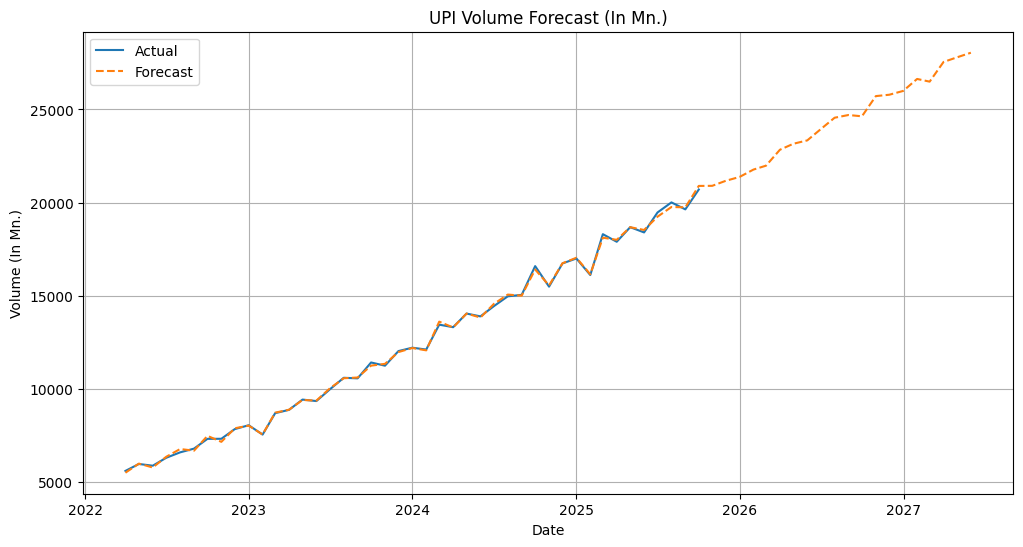

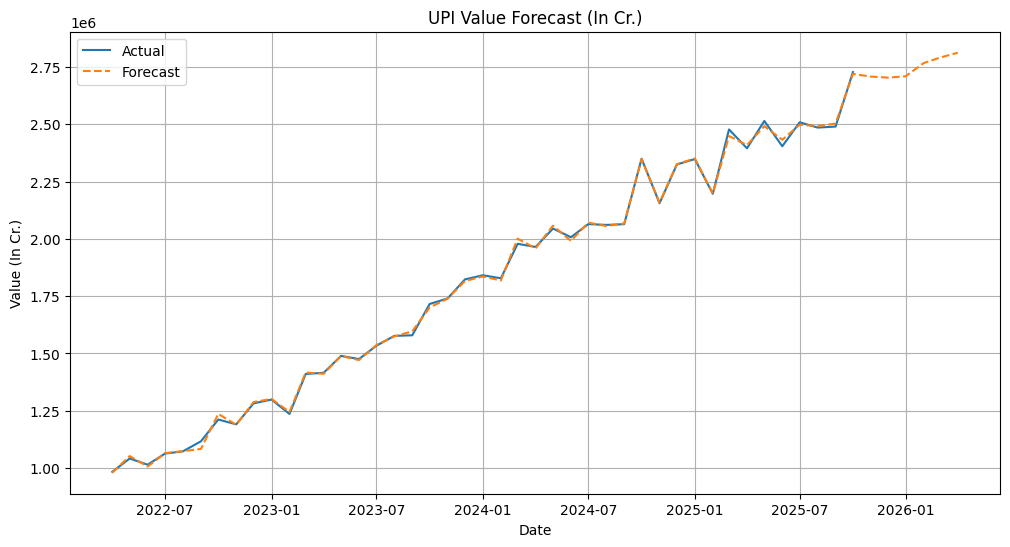

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# -----------------------
# 1. CLEAN & PREPARE DATA
# -----------------------

# Remove old index if it is named 'date'
df = df.reset_index(drop=True)

# Convert month + year into datetime
df['date'] = pd.to_datetime(df['month'] + " " + df['year'].astype(str), format="%B %Y")

# Sort by date
df = df.sort_values('date')


# Clean numeric columns (remove commas + tabs)
df['Volume (In Mn.)'] = (
    df['Volume (In Mn.)']
    .astype(str)
    .str.replace(",", "")
    .str.replace("\t", "")
    .astype(float)
)

df['Value (In Cr.)'] = (
    df['Value (In Cr.)']
    .astype(str)
    .str.replace(",", "")
    .str.replace("\t", "")
    .astype(float)
)

# -----------------------
# 2. FORECAST VOLUME
# -----------------------
vol_df = df[['date', 'Volume (In Mn.)']].rename(columns={'date': 'ds', 'Volume (In Mn.)': 'y'})
model_vol = Prophet()
model_vol.fit(vol_df)

future_vol = model_vol.make_future_dataframe(periods=20, freq='M')
forecast_vol = model_vol.predict(future_vol)

# -----------------------
# 3. FORECAST VALUE
# -----------------------
val_df = df[['date', 'Value (In Cr.)']].rename(columns={'date': 'ds', 'Value (In Cr.)': 'y'})
model_val = Prophet()
model_val.fit(val_df)

future_val = model_val.make_future_dataframe(periods=6, freq='M')
forecast_val = model_val.predict(future_val)

# -----------------------
# 4. PLOT VOLUME FORECAST
# -----------------------
plt.figure(figsize=(12,6))
plt.plot(vol_df['ds'], vol_df['y'], label='Actual')
plt.plot(forecast_vol['ds'], forecast_vol['yhat'], label='Forecast', linestyle='--')
plt.title("UPI Volume Forecast (In Mn.)")
plt.xlabel("Date")
plt.ylabel("Volume (In Mn.)")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------
# 5. PLOT VALUE FORECAST
# -----------------------
plt.figure(figsize=(12,6))
plt.plot(val_df['ds'], val_df['y'], label='Actual')
plt.plot(forecast_val['ds'], forecast_val['yhat'], label='Forecast', linestyle='--')
plt.title("UPI Value Forecast (In Cr.)")
plt.xlabel("Date")
plt.ylabel("Value (In Cr.)")
plt.legend()
plt.grid(True)
plt.show()
